<a href="https://colab.research.google.com/github/proditorIF/Quanta/blob/main/Sep29-30/metroP_markovC_BRM_McLe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Monte Carlo Markov Chain




## (Metropolis algorithm)
 Los métodos de cadenas de Markov Monte Carlo (MCMC) son empelados como
métodos de simulación para generar muestras de las distribuciones a
posteriori o estimar cantidades de interés a posteriori.\
En nuestro caso el algoritmo se emplea el algoritmo de Metropolis  que es una variante específica de MCMC que utiliza una propuesta simétrica (como una distribución gaussiana) para generar valores de los parámetros libres buscando maximizar el valor del posterior, en otras palabras, estamos buscando los valores de W con mayor probabilidad dada la distribución de datos empleando propuestas aleatorias.Cada valor generado depende sólo del anterior valor simulado, de ahí la noción de cadena de Markov.
Para ellos se emplean las siguientes expresiones:\
 **Likelihood**: $In L \quad\alpha  \quad\sum_{i=1}^2 (y_i-Model(xi,\bar{w}))**2$\
 **Postirior**:   $In P \quad\alpha\quad In L+ In (prior)$\
Y se sigue el algoritmo :\
- Definir los valores iniciales de los parámetros libres.
- Genera nuevos valores para los parámetros a partir de una distribución gaussiana (normal) centrada en los valores actuales con una dispersión predefinida.
- Evalura InP y In L
 - Si el logaritmo de la propuesta es mayor que el logaritmo para los valores iniciales aceptar la propuesta.
 - Si el logaritmo de la propuesta es menor que el logaritmo para los valores iniciales genera un número aleatorio entre 0 y 1 y compáralo con la razón entre los logaritmos. Si el número aleatorio es menor que la razón, entonces acepta los nuevos valores  de lo contrario, descarta los valores propuestos y mantén los actuales.
- Actualizar los valores de los parámetros si la propuesta fue aceptada.
- Repetir por k iteraciones

# Código  

In [2]:
from numpy.linalg import linalg
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
file ="/content/drive/MyDrive/Machine_Learn/olympic100m_men.txt"
data=np.loadtxt(file,delimiter=",").T
#Asigamos los datos
x=data[0]
y=data[1]

Mounted at /content/drive


Text(0, 0.5, 'Velocidad')

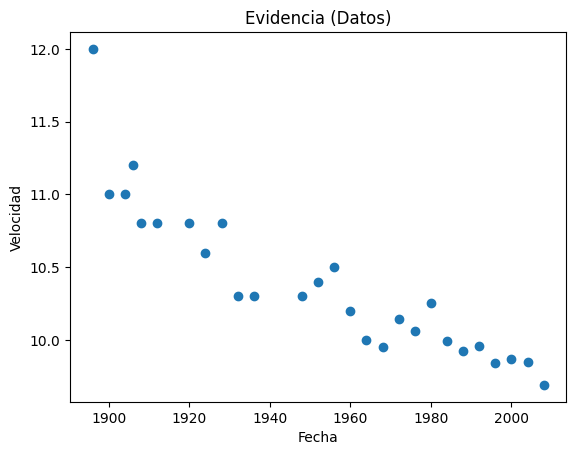

In [4]:
plt.plot(x,y,'o')
plt.title("Evidencia (Datos)")
plt.xlabel("Fecha")
plt.ylabel("Velocidad")

In [6]:
#Valores esperados de un ajuste anterior w1 = -0.013 w0 = 36.41
# Número de iteraciones MCMC
num_iterations = 10000
# Valores iniciales de los parámetros w0 y w1
w0_current = 50
w1_current = -0.7
# Desviación estándar para el muestreo de los parámetros
stdw0 = 0.3
stdw1 = 0.03
# Función para calcular el logaritmo del likelihood
def calculate_log_likelihood(x, y, w0, w1):
    y_pred = w0 + w1 * x
    error = y - y_pred
    log_likelihood = -0.5 * np.sum(error ** 2)
    return log_likelihood

# Función para calcular el logaritmo del prior (prior plano)
def calculate_log_prior(w0, w1,lim0,lim1):
    # Suponemos que w0 y w1 pueden estar en un rango específico
    if lim0[0] <= w0 <= lim0[1] and lim1[0]<= w1 <= lim1[1]:
        return 0.0  # Logaritmo del prior plano
    else:
        return -np.inf  # Fuera de los límites, prior cero

# Listas para almacenar las muestras de los parámetros
w0_samples = []
w1_samples = []
#Limites para el prior
L0 =[20,40]
L1 =[-1,0.5]
# Algoritmo MCMC
for i in range(num_iterations):
    # Propuesta de nuevos valores de w0 y w1 a partir de una distribución gaussiana
    w0_proposed = np.random.normal(w0_current,stdw0)
    w1_proposed = np.random.normal(w1_current,stdw1)

    # Calcula el logaritmo del likelihood y el logaritmo del prior para los valores actuales y propuestos
    log_likelihood_current = calculate_log_likelihood(x, y, w0_current, w1_current)
    log_likelihood_proposed = calculate_log_likelihood(x, y, w0_proposed, w1_proposed)
    log_prior_current = calculate_log_prior(w0_current, w1_current,L0,L1)
    log_prior_proposed = calculate_log_prior(w0_proposed, w1_proposed,L0,L1)

    # Calcula el logaritmo del posterior para los valores actuales y propuestos
    log_posterior_current = log_likelihood_current + log_prior_current
    log_posterior_proposed = log_likelihood_proposed + log_prior_proposed

    # Decide si aceptar o rechazar la propuesta
    if log_posterior_proposed >= log_posterior_current or np.log(np.random.rand()) < log_posterior_proposed - log_posterior_current:
        w0_current = w0_proposed
        w1_current = w1_proposed

    # Guarda los valores actuales como muestras
    w0_samples.append(w0_current)
    w1_samples.append(w1_current)

# Después de muchas iteraciones, w0_samples y w1_samples contendrán las muestras de los parámetros


# Cadenas
La idea fundamental detrás de una cadena en MCMC es que, a medida que avanzas en el tiempo (o en el número de iteraciones), los valores generados deberían converger hacia una distribución de probabilidad que se asemeje a la distribución de probabilidad posterior que estás tratando de aproximar.Por lo tanto, se espera que la cadena converja hacia una distribución estacionaria después de un número suficientemente grande de iteraciones.

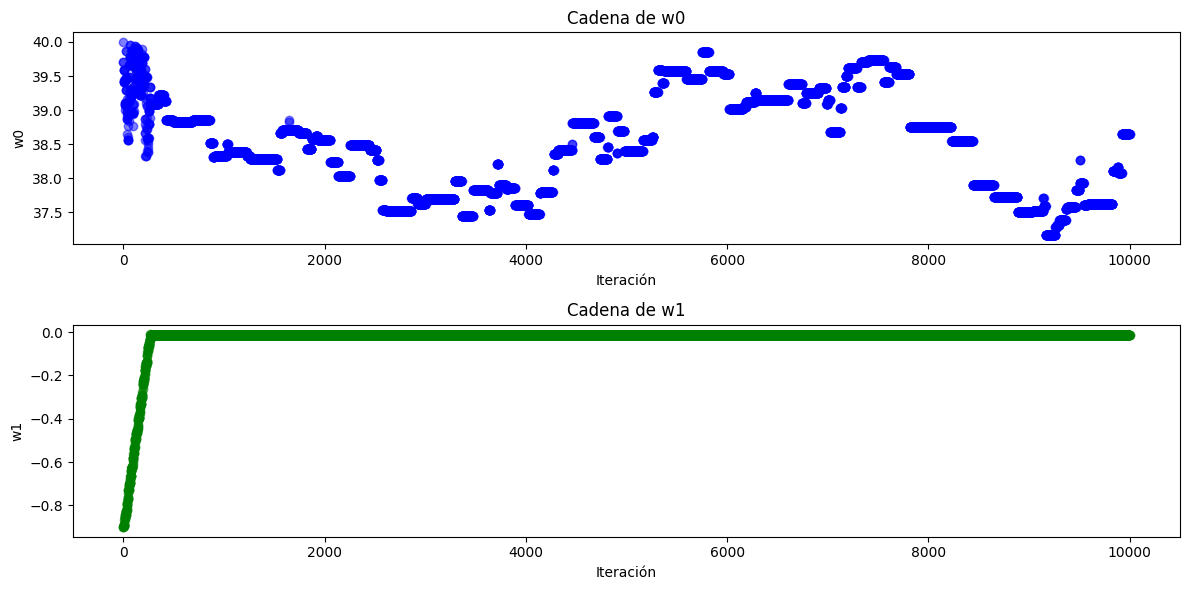

In [ ]:
# Graficar las cadenas de los parámetros w0 y w1
plt.figure(figsize=(12, 6))
# Graficar la cadena de w0
plt.subplot(2, 1, 1)
plt.plot(w0_samples,'o', color='blue', alpha=0.5)
plt.xlabel('Iteración')
plt.ylabel('w0')
plt.title('Cadena de w0')
# Graficar la cadena de w1
plt.subplot(2, 1, 2)
plt.plot(w1_samples,'o',color='green', alpha=0.5)
plt.xlabel('Iteración')
plt.ylabel('w1')
plt.title('Cadena de w1')
plt.tight_layout()
plt.show()


# Walker
El gráfico "walker" permitirá visualizar la exploración del espacio de parámetros y evaluar si la cadena está explorando de manera eficiente la región de alta probabilidad en función de los datos y el modelo.

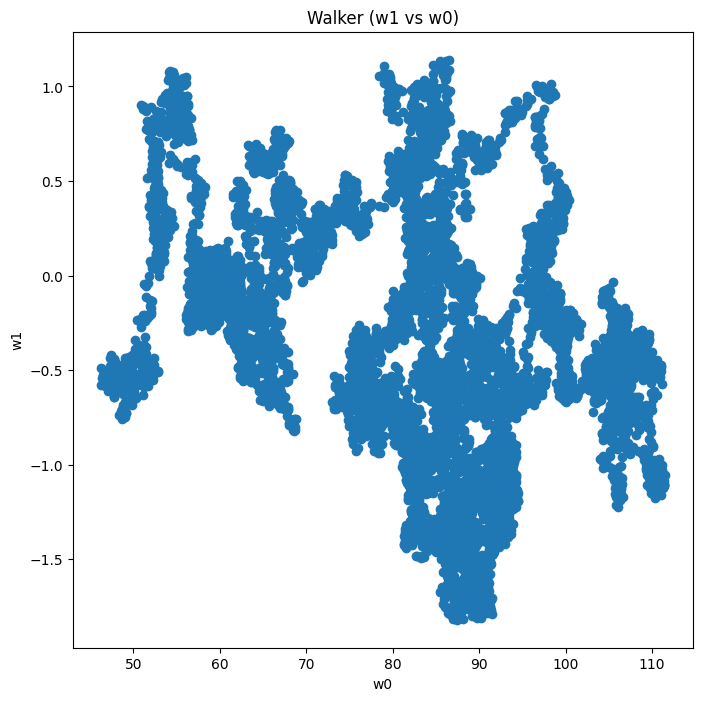

In [7]:
# Graficar el "walker" (w1 vs w0)
plt.figure(figsize=(8, 8))
plt.scatter(w0_samples, w1_samples)
plt.xlabel('w0')
plt.ylabel('w1')
plt.title('Walker (w1 vs w0)')
plt.show()

Text(0.5, 1.0, 'W1')

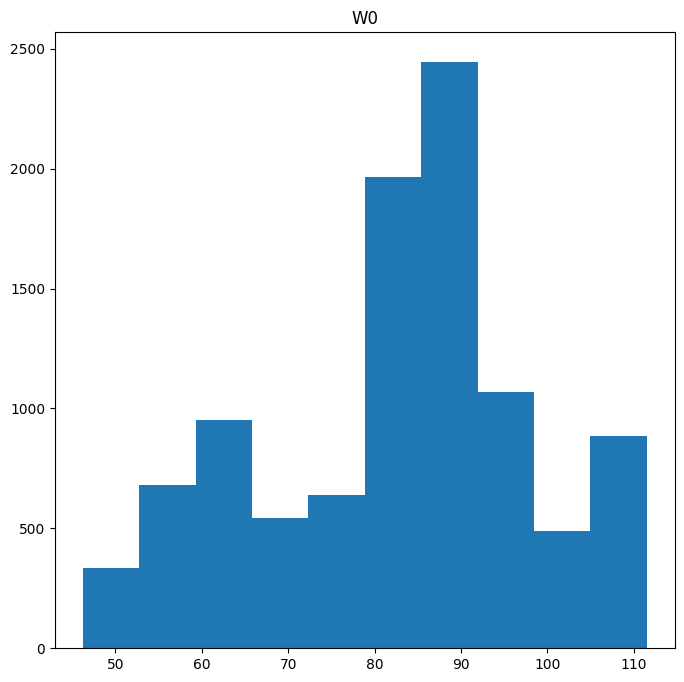

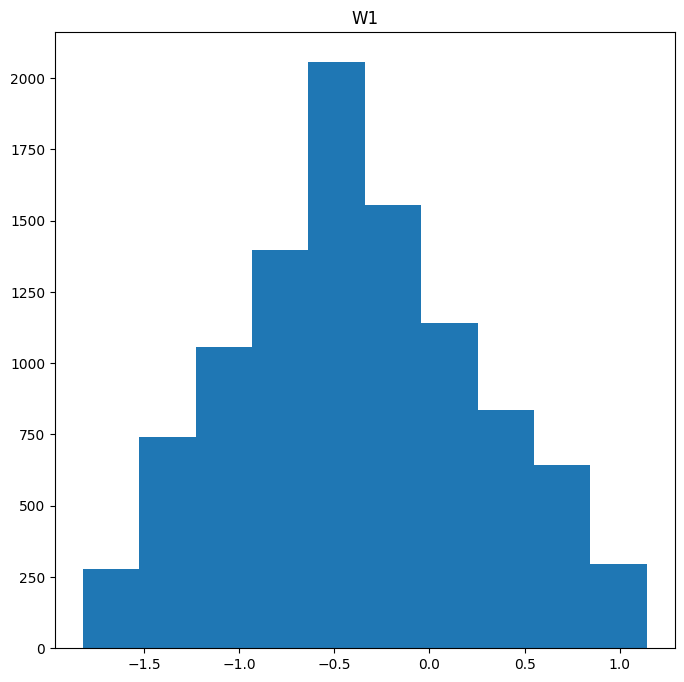

In [8]:
#Histogramas
plt.figure(figsize=(8, 8))
plt.hist(w0_samples)
plt.title('W0')
plt.figure(figsize=(8, 8))
plt.hist(w1_samples)
plt.title('W1')